In [ ]:
#1

In [2]:
import pandas as ps
import numpy as np

In [4]:
forest_fires = ps.read_csv("data/forestfires.csv")

In [5]:
forest_fires

,X,Y,month,day,temp,wind,rain,area
0,7,5,mar,fri,8.2,6.7,0.0,NaN
1,7,4,oct,tue,18.0,0.9,0.0,NaN
2,7,4,oct,sat,14.6,1.3,0.0,NaN
3,8,6,mar,fri,8.3,4.0,0.2,NaN
4,8,6,mar,sun,11.4,1.8,0.0,NaN
...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,27.8,2.7,0.0,6.44
513,2,4,aug,sun,21.9,5.8,0.0,54.29
514,7,4,aug,sun,21.2,6.7,0.0,11.16
515,1,4,aug,sat,25.6,4.0,0.0,0.00


In [6]:
forest_fires.head()

,X,Y,month,day,temp,wind,rain,area
0,7,5,mar,fri,8.2,6.7,0.0,NaN
1,7,4,oct,tue,18.0,0.9,0.0,NaN
2,7,4,oct,sat,14.6,1.3,0.0,NaN
3,8,6,mar,fri,8.3,4.0,0.2,NaN
4,8,6,mar,sun,11.4,1.8,0.0,NaN


In [8]:
forest_fires.describe()

,X,Y,temp,wind,rain,area
count,517.000000,517.000000,515.000000,516.000000,517.000000,379.000000
mean,4.669246,4.299807,18.904272,4.019380,0.021663,17.525198
std,2.313778,1.229900,5.801947,1.792934,0.295959,73.818628
min,1.000000,2.000000,2.200000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,15.550000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,19.300000,4.000000,0.000000,2.570000
75%,7.000000,5.000000,22.800000,4.900000,0.000000,9.985000
max,9.000000,9.000000,33.300000,9.400000,6.400000,1090.840000


In [12]:
forest_fires.dtypes

X          int64
Y          int64
month     object
day       object
temp     float64
wind     float64
rain     float64
area     float64
dtype: object

In [13]:
#1.2

In [15]:
forest_fires.isna().sum()

X          0
Y          0
month      0
day        0
temp       2
wind       1
rain       0
area     138
dtype: int64

In [23]:
forest_fires = forest_fires.fillna({"area":0})

In [17]:
forest_fires.isna().sum()

X        0
Y        0
month    0
day      0
temp     2
wind     1
rain     0
area     0
dtype: int64

In [20]:
forest_fires = forest_fires.dropna()

In [21]:
forest_fires.isna().sum()

X        0
Y        0
month    0
day      0
temp     0
wind     0
rain     0
area     0
dtype: int64

In [22]:
#3.1

In [30]:
forest_fires = forest_fires.drop(["X","Y"],axis =1)

In [32]:
forest_fires

,month,day,temp,wind,rain,area
0,mar,fri,8.2,6.7,0.0,0.00
1,oct,tue,18.0,0.9,0.0,0.00
2,oct,sat,14.6,1.3,0.0,0.00
3,mar,fri,8.3,4.0,0.2,0.00
4,mar,sun,11.4,1.8,0.0,0.00
...,...,...,...,...,...,...
512,aug,sun,27.8,2.7,0.0,6.44
513,aug,sun,21.9,5.8,0.0,54.29
514,aug,sun,21.2,6.7,0.0,11.16
515,aug,sat,25.6,4.0,0.0,0.00


In [33]:
#3.2

In [35]:
forest_fires = forest_fires.sort_values("area", ascending = False)


In [36]:
#3.3

In [37]:
filter_area = forest_fires["area"] > 0

In [40]:
forest_fires = forest_fires[filter_area]

In [41]:
#3.4 # Add a new column named 'Price' 



In [48]:
 
forest_fires["is_rain"] = np.where(forest_fires["rain"] > 0, True,False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
forest_fires

,month,day,temp,wind,rain,area,is_rain
238,sep,sat,25.1,4.0,0.0,1090.84,False
415,aug,thu,27.5,4.9,0.0,746.28,False
479,jul,mon,22.6,4.9,0.0,278.53,False
237,sep,tue,18.8,2.2,0.0,212.88,False
236,sep,sat,18.2,1.8,0.0,200.94,False
...,...,...,...,...,...,...,...
439,sep,fri,19.1,2.2,0.0,0.33,False
251,aug,wed,24.0,3.1,0.0,0.24,False
252,aug,wed,22.1,3.6,0.0,0.21,False
266,aug,tue,19.4,4.0,0.0,0.17,False


In [50]:
#3.5

In [52]:
forest_fires.groupby(["month","day","is_rain"]).mean()

temp      wind  rain        area
month day is_rain                                       
apr   mon False    10.900000  3.100000   0.0    3.350000
      sun False    13.700000  9.400000   0.0   61.130000
      thu False     5.800000  5.800000   0.0    7.770000
aug   fri False    20.000000  4.954545   0.0   10.494545
          True     21.100000  7.600000   1.4    2.170000
      mon False    28.616667  2.666667   0.0    2.968333
      sat False    20.600000  4.176471   0.0   23.974706
      sun False    22.480000  4.535000   0.0   19.733000
      thu False    22.380000  3.080000   0.0   83.717000
      tue False    22.613333  4.626667   0.0   10.905333
          True     27.300000  4.900000   6.4   10.820000
      wed False    22.805882  3.629412   0.0   20.475882
dec   fri False     2.200000  4.900000   0.0    9.270000
      mon False     4.600000  8.500000   0.0   15.095000
      sun False     4.800000  8.500000   0.0    8.980000
      thu False     5.100000  4.900000   0.0    5.380000
      tue False     5.100000  8.500000   0.0   24.770000
      wed False     5.100000  8.000000   0.0   11.190000
feb   fri False     7.850000  8.700000   0.0   14.430000
      mon False     7.500000  6.300000   0.0    9.960000
      sat False     4.600000  0.900000   0.0    6.840000
      sun False    10.433333  2.066667   0.0   23.736667
      tue False     4.850000  5.850000   0.0    3.765000
      wed False     8.800000  3.100000   0.0    1.100000
jul   fri False    18.150000  2.450000   0.0   19.830000
      mon False    22.700000  4.700000   0.0  140.080000
      sat False    22.166667  2.700000   0.0    3.380000
      sun False    24.600000  3.575000   0.0    4.307500
      thu False    28.700000  2.900000   0.0    2.255000
      tue False    22.075000  3.700000   0.0   25.100000
      wed False    19.300000  7.200000   0.0    7.730000
jun   fri False    23.200000  5.400000   0.0    1.190000
      mon False    16.700000  4.700000   0.0    2.730000
      sat False    24.500000  3.100000   0.0   70.320000
      sun False    14.300000  1.800000   0.0    0.900000
      thu False    24.550000  6.050000   0.0    6.635000
      wed False    28.000000  4.500000   0.0    8.160000
mar   fri False    13.150000  6.700000   0.0    5.420000
      mon False    12.783333  4.833333   0.0   16.990000
      sat False    15.520000  4.640000   0.0   16.130000
      sun False    11.800000  4.466667   0.0    9.176667
      thu False     9.300000  4.050000   0.0    4.375000
      wed False    11.200000  5.400000   0.0    5.550000
may   fri False    18.000000  4.000000   0.0   38.480000
oct   mon False    17.333333  4.166667   0.0   20.546667
      sat False    18.400000  3.100000   0.0   24.230000
      wed False    20.200000  2.700000   0.0   13.700000
sep   fri False    17.936364  3.836364   0.0    9.151364
      mon False    18.950000  3.021429   0.0   11.845000
      sat False    21.057143  3.435714   0.0  110.365000
      sun False    21.035714  4.400000   0.0   27.020714
      thu False    19.433333  3.916667   0.0    9.373333
      tue False    19.538462  3.153846   0.0   38.514615
      wed False    20.900000  2.787500   0.0   22.800000

In [53]:
#4

In [54]:
import matplotlib as plt
import seaborn as sns

In [55]:
#histogram

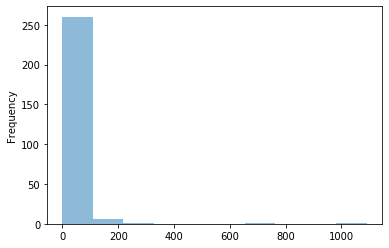

In [62]:
forest_fires["area"].plot(kind = "hist",alpha = 0.5)


In [63]:
#histogram sns

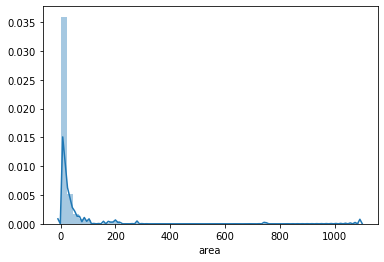

In [71]:
sns.distplot(forest_fires['area'])


In [72]:
#scatter plot of temp vs. area

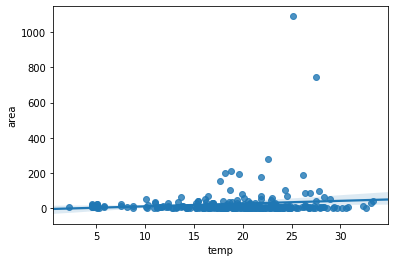

In [73]:
sns.regplot(x='temp', y='area', data=forest_fires)
